In [355]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [356]:
train_df=pd.read_csv(r"D:\Users\abhisv\Desktop\train.csv")
test_df=pd.read_csv(r"D:\Users\abhisv\Desktop\test.csv")
(train_df.shape),(test_df.shape)

((550068, 12), (233599, 11))

In [357]:
df=pd.concat([train_df,test_df],axis=0)

In [358]:
df.shape

(783667, 12)

In [359]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [360]:
df.drop('User_ID',axis=1,inplace=True)

In [361]:
df['Product_ID']=df['Product_ID'].str.replace('P00','')

In [362]:
def null_valuetreat(df):
    null_value_table=df.isna().sum()/df.shape[0]*100
    print('Total columns are:',null_value_table)
    retained_column=null_value_table[null_value_table<int(input())].index
    print('The retained_columns are:',retained_column)
    df.drop('Product_Category_3',axis=1,inplace=True)
    drop_column=null_value_table[null_value_table>int(input())].index
    print('The columns to be dropped are:',drop_column)
    numerical=[i for i in df if df[i].dtypes!='O']
    print('The numerical columns are:',numerical)
    cat=[i for i in df if df[i].dtypes=='O']
    print('The categorical columns are:',cat)
    #Lets check the discrete and continous variables in numerical
    discrete=[i for i in df.columns if len(df[i].unique())<25]
    print('The discrete number of columns are:',len(discrete))
    print('The discrete columns are:',discrete)
    discrete_with_nan=[i for i in discrete if df[i].isna().sum()/df.shape[0]*100]
    print('The discrete_with_nan columns are:',discrete_with_nan)
    for i in discrete_with_nan:
        df[i].fillna(df[i].mean(),inplace=True)
    continous=[i for i in df.columns if len(df[i].unique())>25]
    print('The continous number of columns are:',len(continous))
    print('continous columns are:',continous)
    for i in continous:
        df[i].fillna(df[i].median(),inplace=True)
    return df,cat,numerical,discrete,continous

In [363]:
df,cat,numerical,discrete,continous=null_valuetreat(df)

Total columns are: Age                            0.000000
City_Category                  0.000000
Gender                         0.000000
Marital_Status                 0.000000
Occupation                     0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Product_ID                     0.000000
Purchase                      29.808452
Stay_In_Current_City_Years     0.000000
dtype: float64
30
The retained_columns are: Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_ID', 'Purchase',
       'Stay_In_Current_City_Years'],
      dtype='object')
30
The columns to be dropped are: Index(['Product_Category_2', 'Product_Category_3'], dtype='object')
The numerical columns are: ['Marital_Status', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Purchase']
The categorical columns are: ['Age', 'City_Category', 'Gender', 'Product_ID', 'Stay_In_Curr

In [364]:
df.isna().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
dtype: int64

In [365]:
#Lets do some encoding
gender_dict={'M':0,'F':1}
df['Gender']=df['Gender'].apply(lambda x:gender_dict[x])
df['Gender'].value_counts()

0    590031
1    193636
Name: Gender, dtype: int64

In [366]:
city_dict = {'A':0, 'B':1, 'C':2}
df['City_Category'] = df['City_Category'].apply(lambda line: city_dict[line])
df['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [367]:
df=pd.get_dummies(df,columns=['Stay_In_Current_City_Years'])

In [368]:
Age={'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
df['Age']=df['Age'].apply(lambda x:Age[x])

In [369]:
#df=pd.get_dummies(df,columns=['City_Category'])

In [370]:
df=pd.get_dummies(df,columns=['Gender'])

In [371]:
#df=pd.get_dummies(df,columns=['Age'])

In [372]:
df=pd.get_dummies(df,columns=['Marital_Status'])

In [373]:
df.head()

,Age,City_Category,Occupation,Product_Category_1,Product_Category_2,Product_ID,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Gender_0,Gender_1,Marital_Status_0,Marital_Status_1
0,0,0,10,3,9.844506,069042,8370.0,0,0,1,0,0,0,1,1,0
1,0,0,10,1,6.000000,248942,15200.0,0,0,1,0,0,0,1,1,0
2,0,0,10,12,9.844506,087842,1422.0,0,0,1,0,0,0,1,1,0
3,0,0,10,12,14.000000,085442,1057.0,0,0,1,0,0,0,1,1,0
4,6,2,16,8,9.844506,285442,7969.0,0,0,0,0,1,1,0,1,0


In [374]:
df.drop('Product_ID',axis=1,inplace=True)

In [375]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [376]:
#df.cov() # Covariance gives the direction of the relationship, but dont give the strength.
#Cov ranges from -inf to +inf. and also doesn't give standardize value

In [377]:
#df.corr()

In [378]:
#df.corr(method='spearman')

Text(0.5, 1.0, 'Purchase amount distribution')

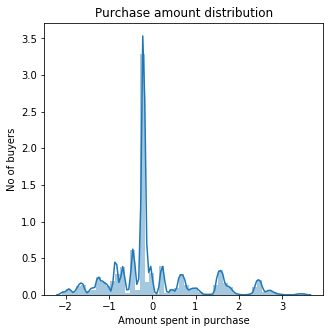

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.distplot(df['Purchase'],kde=True,bins=50)
plt.xlabel('Amount spent in purchase')
plt.ylabel('No of buyers')
plt.title('Purchase amount distribution')

In [380]:
y=df[['Purchase']]
x=df

In [381]:
x.drop('Purchase',axis=1,inplace=True)

In [382]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [383]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((548566, 14), (235101, 14), (548566, 1), (235101, 1))

In [384]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
LR=LinearRegression()
LR.fit(x_train,y_train)
y_hat=LR.predict(x_train)

In [385]:
LR.coef_

array([[ 2.77913431e-02,  4.24492548e-02,  7.42076155e-03,
        -2.69049749e-01, -4.66466238e-02, -4.96731855e+09,
        -6.94782323e+09, -5.65284438e+09, -5.49761482e+09,
        -5.24818829e+09, -6.59630064e+10, -6.59630064e+10,
        -2.41527238e+10, -2.41527238e+10]])

In [386]:
LR.intercept_

array([0.00050337])

In [387]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
score=r2_score(y_train,y_hat)*100
score

8.88451867297272

In [388]:
#import scipy.stats as stats
#stats.probplot(df['Purchase'],dist='norm',plot=plt)

In [389]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_lasso_pred=lasso.predict(x_train)

In [390]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
score=r2_score(y_train,y_lasso_pred)
score

0.0

In [391]:
lasso.coef_

array([ 0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.])

In [392]:
lasso.intercept_

array([0.00031161])

In [393]:
import statsmodels.api as sm

In [394]:
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train.astype(float))

In [395]:
results=model.fit()
results.params

const                            4.860550e-04
Age                              2.761914e-02
City_Category                    4.244245e-02
Occupation                       7.500425e-03
Product_Category_1              -2.690778e-01
Product_Category_2              -4.663905e-02
Stay_In_Current_City_Years_0     7.331838e+09
Stay_In_Current_City_Years_1     1.025509e+10
Stay_In_Current_City_Years_2     8.343684e+09
Stay_In_Current_City_Years_3     8.114563e+09
Stay_In_Current_City_Years_4+    7.746406e+09
Gender_0                        -1.836737e+08
Gender_1                        -1.836737e+08
Marital_Status_0                -2.569396e+08
Marital_Status_1                -2.569396e+08
dtype: float64

In [396]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4862.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:00:27   Log-Likelihood:            -7.5297e+05
No. Observations:              548566   AIC:                         1.506e+06
Df Residuals:                  548554   BIC:                         1.506e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [397]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_train_hat=xgb.predict(x_train)

[16:00:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [398]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
score=r2_score(y_train,y_train_hat)
score

0.4485407967431714

### As seen Linear and Lasso doesn't perform well, but XGB made good perform.

#### ///////////////////////////////////////////////////////////////////
Lets Start Neural Network with different layers

In [411]:
x.shape,y.shape

((783667, 14), (783667, 1))

In [412]:
def layer_sizes(x,y):
    n_x=x.shape[1]
    n_h=10
    n_y=y.shape[1]
    return(n_x,n_h,n_y)

In [413]:
n_x,n_h,n_y=layer_sizes(x,y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 14
The size of the hidden layer is: n_h = 10
The size of the output layer is: n_y = 1


In [414]:
def initialize_parameters(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

In [415]:
parameters=initialize_parameters(n_x,n_h,n_y)

In [416]:
parameters

{'W1': array([[ 0.0059982 ,  0.00549384,  0.01383781,  0.00148349, -0.00653541,
          0.01408834,  0.00712061, -0.01800716,  0.00747599, -0.00232897,
          0.01110645, -0.00373339,  0.00786146,  0.00194169],
        [ 0.00586204, -0.00020387, -0.00414409,  0.00067313,  0.00631799,
          0.00417593,  0.01615176,  0.00425606,  0.00635364,  0.02102229,
          0.00066126,  0.00535558, -0.00603141,  0.00041958],
        [ 0.01641915,  0.00311698,  0.0145117 , -0.01064928, -0.01400845,
          0.00307526, -0.01369639,  0.02670337,  0.0124845 , -0.01245727,
         -0.00167169, -0.00576611,  0.00416022, -0.00057847],
        [ 0.00931887,  0.01468332, -0.00221321, -0.01173156,  0.00562669,
         -0.00164515,  0.01144855, -0.00152118,  0.00829789,  0.00336066,
         -0.00189044, -0.00449329,  0.00713524,  0.02529735],
        [ 0.00837616, -0.00131682,  0.00707593,  0.00114054, -0.01280895,
          0.00309846,  0.01548291, -0.00315828, -0.01125904,  0.00488497,
      

In [417]:
##Initialize deep neural network with 3 hidden layers.[14,10,9,8,1]

In [456]:
def initialize_deep_layers(layer_dims): #layer_dims is the list containing dimension of each layer.
    np.random.seed(2)
    parameters={}
    L=len(layer_dims)
    for l in range(1,L):
        parameters['W'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b'+str(l)]=np.zeros((layer_dims[l],1))
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

In [457]:
parameters=initialize_deep_layers([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))
print("W4 = " + str(parameters["W4"]))
print("b4 = " + str(parameters["b4"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00878108 -0.00156434  0.0025657  -0.00988779]
 [-0.00338822 -0.00236184 -0.00637655 -0.01187612]
 [-0.01421217 -0.00153495 -0.00269057  0.02231367]]
b2 = [[0.]
 [0.]
 [0.]]


KeyError: 'W3'

In [458]:
#Forward propogation module
#Z[l] = W[l]A[l-1] +b[l]
#Lets have LINEAR>RELU in hidden layers and LINEAR>SIGMOID in the output layer.

In [482]:
A = np.random.randn(14,2)
W = np.random.randn(1,14)
b = np.random.randn(1,1)
def linear_forward(A, W, b):
    Z=np.dot(W,A)+b
    print('The shape of Z',Z.shape)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z,cache

In [483]:
Z,cache=linear_forward(A, W, b)
Z

The shape of Z (1, 2)


array([[-5.96900274, -2.95915886]])

In [487]:
import math

def sigmoid(Z):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-Z))
    ### END CODE HERE ###
    
    return s

In [507]:
def ReLU(z): 
    a=max(0,Z)
    return a

In [509]:
A_prev = np.random.randn(14,4)
def linear_activation_forward(A_prev,W,b,activation):
    if activation=='sigmoid':
        Z,cache=linear_forward(A_prev, W, b)
        A,activation_cache=sigmoid(Z)
    elif activation=='relu':
        Z,cache=linear_forward(A_prev, W, b)
        A,activation_cache=ReLU(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A,cache

In [510]:
A,linear_activation_cache=linear_activation_forward(A_prev,W,b,activation='relu')

The shape of Z (1, 4)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()